### Aula 4 - Plus 

**obs**: Deve ser estudada antes de resolver a tarefa, pois na tarefa usamos o último gráfico para resolver um dos exercícios.

A ideia desse jupyter é apresentar pra vocês uma função chamada meshgrid. Em ciência de dados usamos muito ela para representar a região de decisão de um modelo. Essa função constrói uma malha de pontos que podemos "pintar" utilizando alguma função específica. No caso dos modelos de machine learning, nós usamos a função de predição do modelo para pintar a malha (Vocês verão nos próximos módulos)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

#### Como construímos gráficos?

Para construirmos um gráfico no plano cartesiano ($\ R^2$), no eixo x colocamos os valores do domínio da função e no eixo y, os valores f(x), ou seja, os pares do plano serão (x,f(x)).

<div>
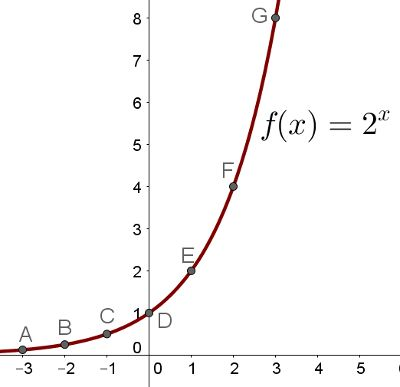
</div>

Para o nosso exemplo vamos considerar a seguinte função que possuí agora dois parâmetros de entrada:  $f(x_1,x_2) = x_1^2 + x_2^2$. Sendo assim, para desenharmos o gráfico em $R^3$, precisaremos de dois eixos para as entradas e um eixo para a $f(x_1,x_2)$. Na figurua abaixo temos os pontos $(x_1,x_2,f(x_1,x_2))$.

In [3]:
def f(x1, x2):
    return x1**2 + x2**2


<div>
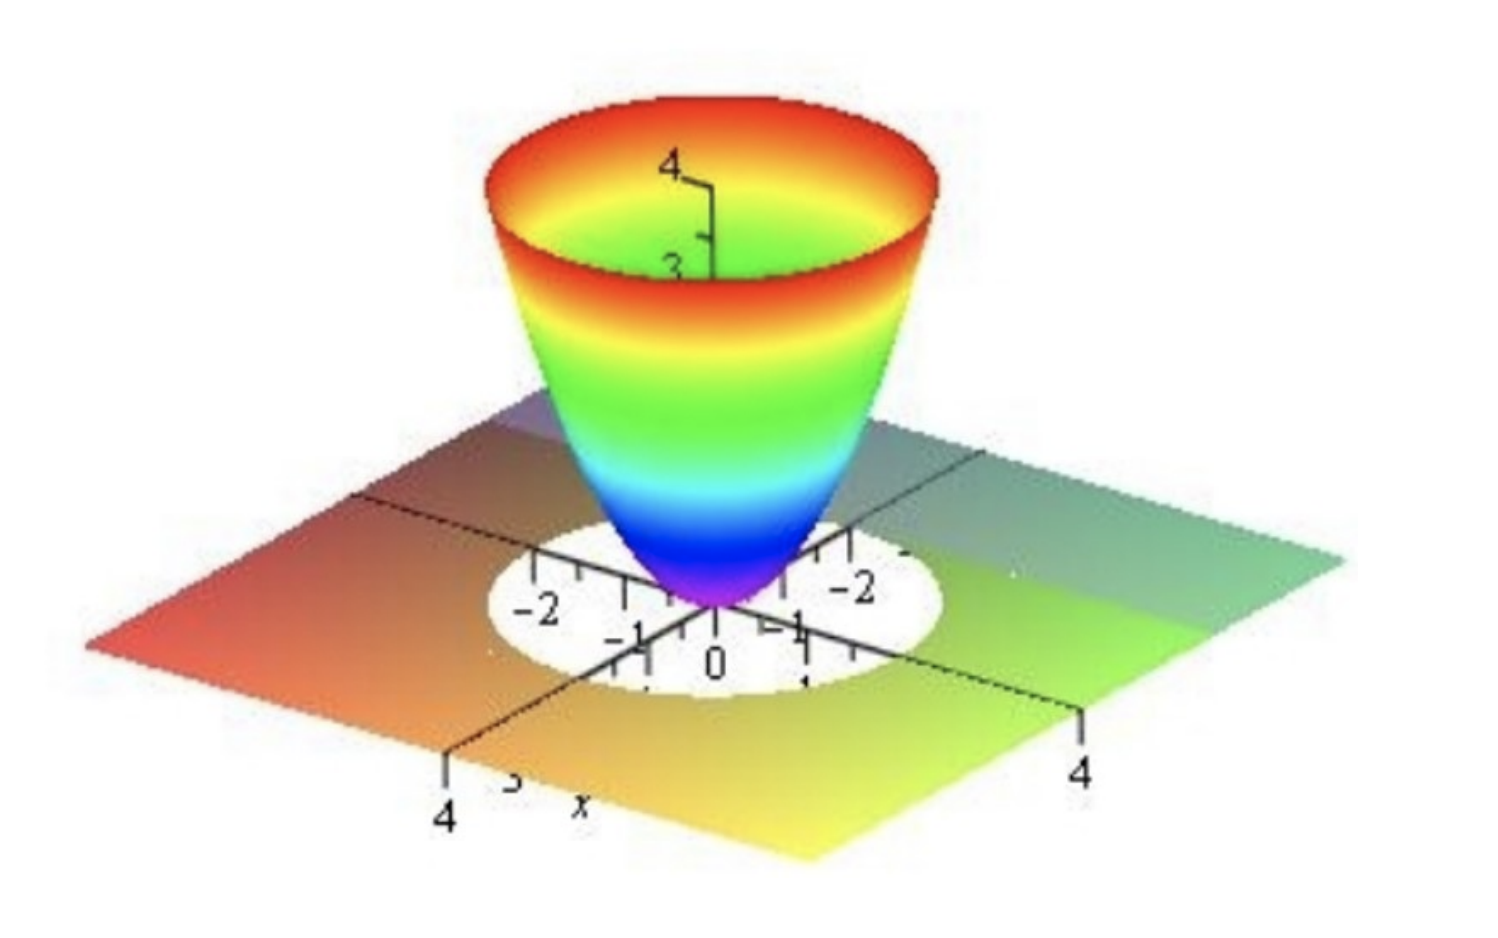
</div>

A ideia agora é projetar esse gráfico em $R^2$. Para isso vamos definir o domínio da função com os seguintes valores para $x_1$ e $x_2$:

In [19]:
#Definindo tamanho dos vetores para o meshgrid

x1_lims = np.arange(-10,10,0.5)
x2_lims = np.arange(-10,10,0.5)

In [20]:
print(x1_lims.shape)
x1_lims

(40,)


array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5])

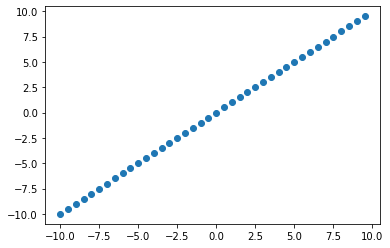

In [21]:
plt.scatter(x1_lims, x2_lims)
plt.show()

Usando esses dois vetores, queremos criar uma malha. Queremos preencher todo o grafico com pontos e para isso usamos a função meshgrid do numpy.

In [22]:
def create_meshgrid(x1_lims, x2_lims):
    x1mesh, x2mesh = np.meshgrid(x1_lims, x2_lims)
    return np.c_[x1mesh.ravel(), x2mesh.ravel()]

In [26]:
#percebam que cada um dos vetores tinha 40 elementos e o mesh tem dimensões (1600,2)
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape

(1600, 2)

In [27]:
mesh

array([[-10. , -10. ],
       [ -9.5, -10. ],
       [ -9. , -10. ],
       ...,
       [  8.5,   9.5],
       [  9. ,   9.5],
       [  9.5,   9.5]])

A malha criada pelo meshgrid é dessa forma. A ideia agora é aplicar a função em cada ponto dessa malha.

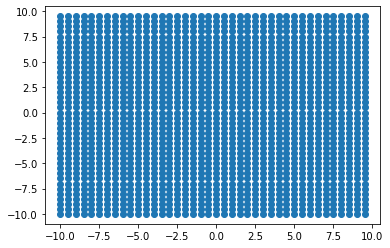

In [29]:
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.show()

In [30]:
#aplicando a função em todos os pontos da malha e salvando os valores na lista L:

L = []
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    L.append(value_f)

O gráfico abaixo mostra os valores de x1, x2 e o parâmetro "c" que serve para especificar a cor, colocamos os valores da função. Sendo assim, os valores cujo f(x1,x2) forem iguais terão a mesma cor no gráfico.

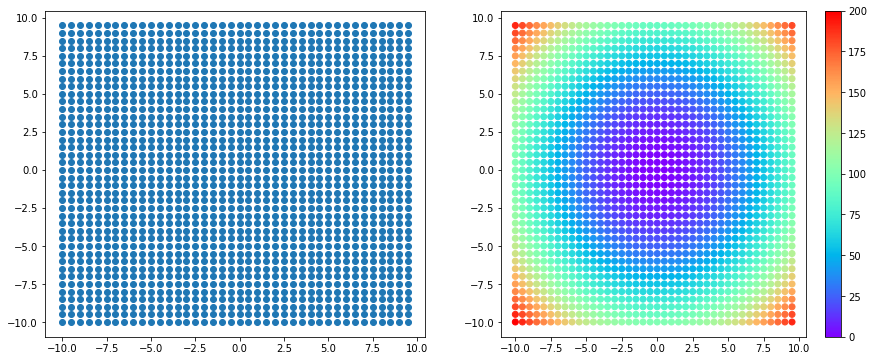

In [32]:
#primeiro gráfico mostra a malha e o segundo a malha "pintada" com os valores da função.
plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.subplot(1,2,2)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow) #CMAP = STYLE DE COR
plt.colorbar()
plt.show()

A malha construída acima não é contínua, no sentido de que, não temos tantos pontos e por isso eles ficam mais espalhados. Podemos diminuir o tamanho da malha, gerando novos valores para $x_1$ e $x_2$ e executanto os mesmos passos de antes.

obs: colocamos agora 0.02 o tamanho do passo na função arange.

In [36]:
#diminuindo o tamanho da malha: "vamos simular uma malha contínua"

x1_lims = np.arange(-10,10,0.02)
x2_lims = np.arange(-10,10,0.02)
mesh = create_meshgrid(x1_lims, x2_lims)
mesh.shape

(1000000, 2)

In [37]:
L = []
for v in mesh:
    x1 = v[0]
    x2 = v[1]
    value_f = f(x1, x2)
    L.append(value_f)

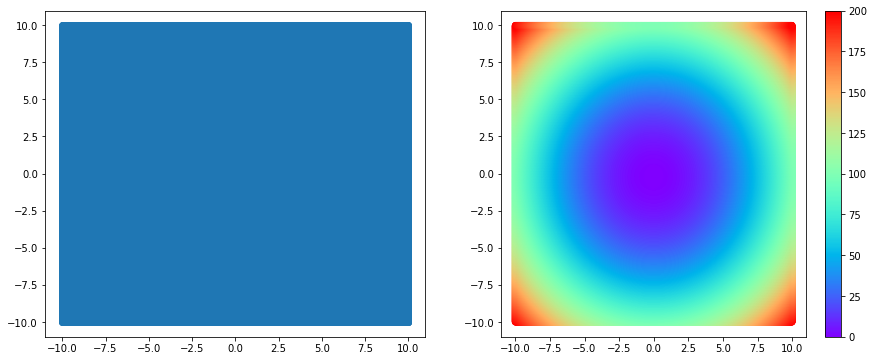

In [38]:
#vejam como agora a malha preenche bem toda a área do gráfico e a malha pintada é contínua.

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.scatter(mesh[:, 0], mesh[:, 1])
plt.subplot(1,2,2)
plt.scatter(mesh[:, 0], mesh[:, 1], c = L, cmap = plt.cm.rainbow)
plt.colorbar()
plt.show()

In [ ]:
#Vocês podem mudar a função,a malha e testar novos exemplos.